<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_11_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

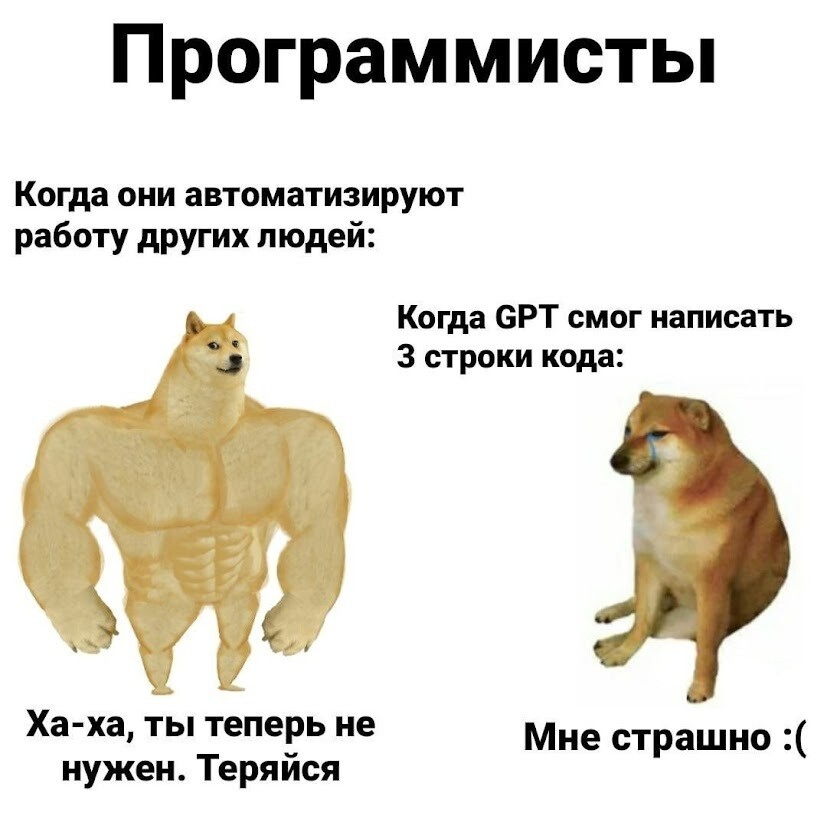

In [12]:
s = 'eat tea ran aet ate nra bat'
s = s.split()

srt = []
for i in s:
  i = ''.join(sorted(i))
  srt.append(i)
print(srt)
#print(set(s[2]))

['aet', 'aet', 'anr', 'aet', 'aet', 'anr', 'abt']


## Деревья
Древовидная структура данных — это нелинейная структура данных, в которой набор элементов, известных как узлы, соединены друг с другом ребрами таким образом, что между любыми двумя узлами существует ровно один путь.



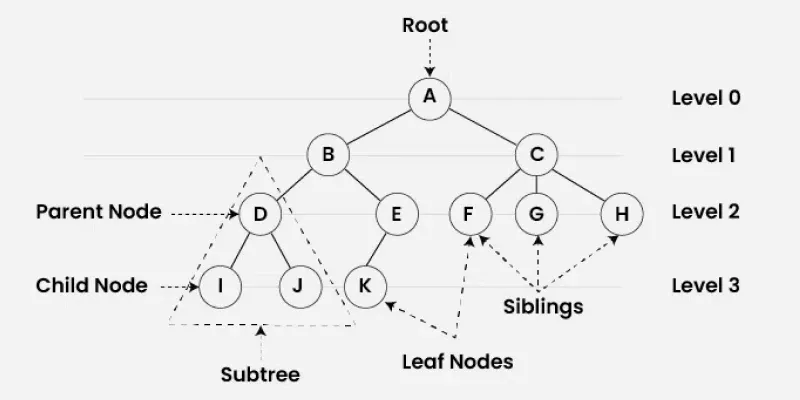

Виды деревьев:
- **Двоичное дерево** : Каждый узел имеет не более двух дочерних элементов
- **Троичное дерево** : Каждый узел имеет не более трех дочерних элементов
- **N-ичное дерево** : Каждый узел имеет не более n дочерних элементов.

## Двоичные деревья
Структура данных двоичного дерева — это иерархическая структура данных, в которой каждый узел имеет не более двух дочерних элементов, называемых левым и правым потомками. Он обычно используется в информатике для эффективного хранения и извлечения данных с различными операциями, такими как вставка, удаление и обход.



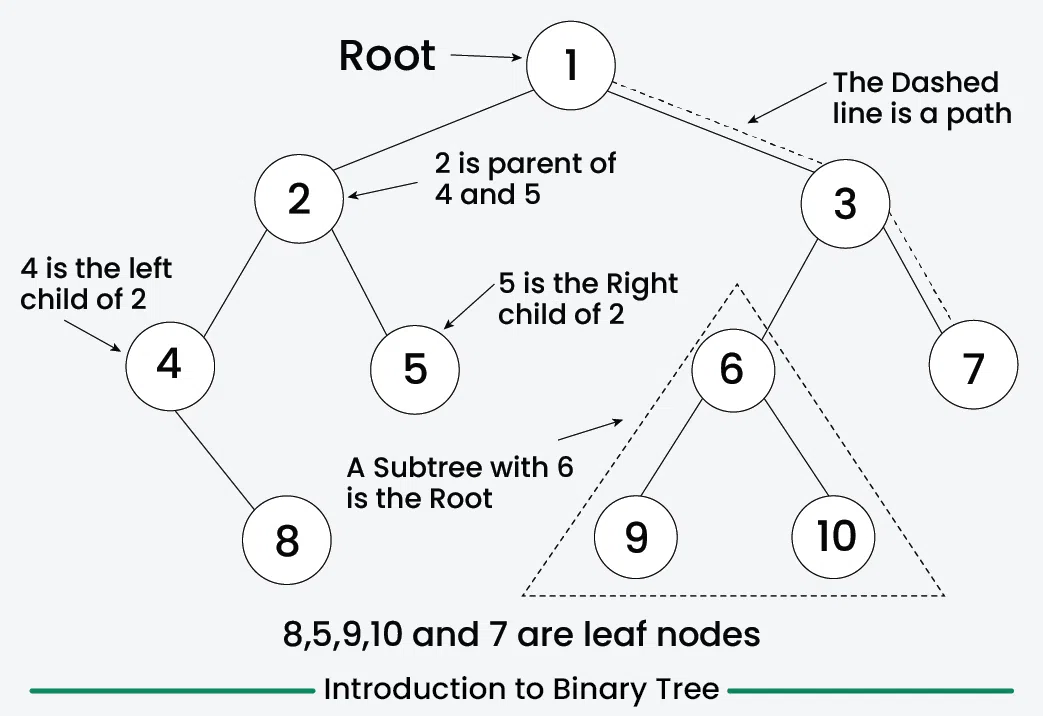

### Свойства
1. Максимальное количество узлов на уровне $l$  

Двоичное дерево может иметь не более $2^l$ узлов на уровне $l$.

2. Максимальное количество узлов в двоичном дереве высотой $h$

Двоичное дерево высоты $h$ может иметь не более $2^{h+1} - 1$ узлов.

- **Определение высоты**: Самый длинный путь от корня до листового узла. Обратите внимание, что дерево только с одним корневым узлом считается имеющим высоту 0, а пустое дерево (или корень равен NULL) считается имеющим высоту "-1".

- **Альтернативное соглашение о высоте**: Некоторые книги считают, что дерево только с одним корневым узлом считается имеющим высоту 1, а пустое дерево (или корень равен NULL) считается имеющим высоту 0. Получаем формулу $2^{h - 1}$.

3. Минимальная высота для $N$ узлов
Минимально возможная высота для $N$ узлов равна $log_2 h$.

$N ≤ 2^{h+1} − 1$  
$2^{h+1} ≥ N+1$  
$h + 1 ≥ log_2​(N+1)$   
$h ≥ log_2 ​N$

4. Минимальные уровни для $L$ листьев  
Двоичное дерево с $L$ листьями должно иметь не менее $log_2 L$ уровней.

**Почему?** Дерево имеет максимальное количество листьев, когда все уровни полностью заполнены.

$L ≤ 2^l$, l - уровень дерева  
$l_{min} = log⁡_2 L$

5. Узлы с двумя потомками и листья
В полном двоичном дереве (где каждый узел имеет либо 0, либо 2 дочерних элемента) число листьев ($L$) всегда на один больше, чем внутренних узлов ($T$) с двумя потомками:

$L=T+1$

6. Общее количество ребер в двоичном дереве  
В любом непустом двоичном дереве с $n$ узлами общее количество ребер равно $n - 1$.

Каждый узел (кроме корня) имеет ровно одного родителя, и каждое соединение «родитель-потомок» представляет собой ребро.

Так как существует $n$ узлов, то должно быть $n - 1$ ребер.

## Куча. Сортировка кучей

Двоичная куча или пирамида (англ. Binary heap) — такое двоичное подвешенное дерево, для которого выполнены следующие три условия:
Значение в любой вершине не больше (если куча для минимума), чем значения её потомков.
На $i$-ом слое $2^i$ вершин, кроме последнего. Слои нумеруются с нуля.
Последний слой заполнен слева направо (как показано на рисунке)


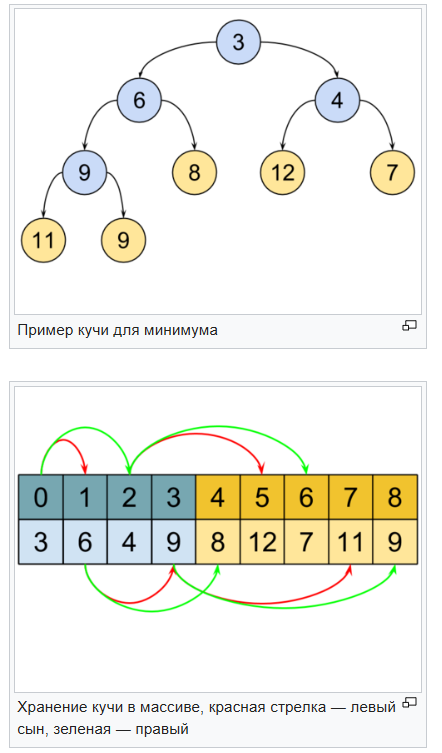

```python
Индексы:    [0,   1,   2,   3,   4,   5]
Значения:   [10,  8,   7,   5,   3,   2]

        10(0)
       /    \
     8(1)   7(2)
    /   \   /
  5(3) 3(4) 2(5)
```

https://neerc.ifmo.ru/wiki/index.php?title=%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D0%B0%D1%8F_%D0%BA%D1%83%D1%87%D0%B0

### Базовые операции с кучей
- Восстановление свойства кучи (Heapify)

In [1]:
def heapify(arr, n, i):
    largest = i  # корень
    left = 2*i + 1
    right = 2*i + 2

    # Сравниваем с левым потомком
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Сравниваем с правым потомком
    if right < n and arr[right] > arr[largest]:
        largest = right

    # Если наибольший не корень
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, n, largest)  # рекурсивно heapify

- Построение кучи

In [2]:
def build_heap(arr):
    n = len(arr)
    # Проходим от последнего родителя к корню
    for i in range(n//2 - 1, -1, -1):
      print(i)
      heapify(arr, n, i)

### Алгоритм сортировки (Heapsort)

1. Построить максимальную кучу из массива

2. Максимальный элемент находится в корне (arr[0])

3. Меняем его с последним элементом

4. Уменьшаем размер кучи на 1

5. Вызываем heapify для корня

6. Повторяем шаги 2-5 пока куча не пуста

In [3]:
def heapsort(arr):
    n = len(arr)

    # 1. Построение максимальной кучи
    build_heap(arr)

    # 2. Извлечение элементов один за другим
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # перемещаем корень в конец
        heapify(arr, i, 0)  # восстанавливаем кучу для уменьшенного массива

# Пример использования
arr = [12, 11, 13, 5, 6, 7]
heapsort(arr)
print(arr)  # [5, 6, 7, 11, 12, 13]

2
1
0
[5, 6, 7, 11, 12, 13]


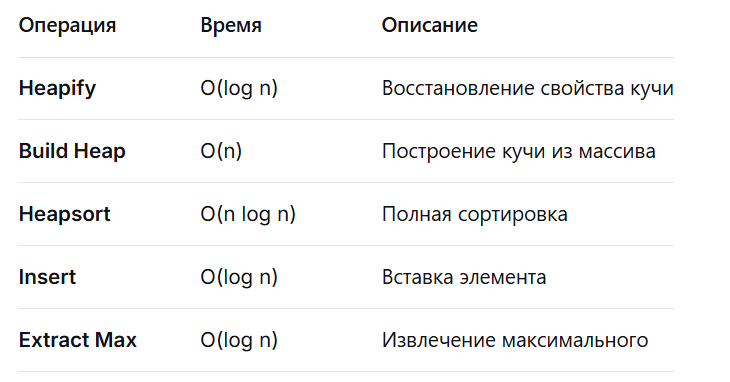

# Хеширование (Hash function)
- процедура сопоставления файлам определенного размера фиксированных значений
- даёт одинаковый хеш для одинаковых данных, из минусов: иногда выдает одинаковые значения для разных данных данных :(

  

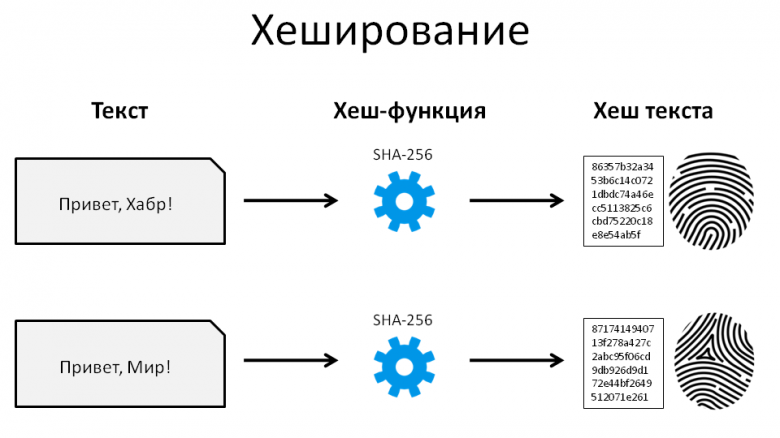

- Коллизия - сопоставление одинаковых значений хеша для разных данных
Свойства хеш функций:
1. Должны давать равномерное распределённые хеши
2. Эффективность вычислений
3. Должна быть детерминирована
4. Используется заданный интервал значений


## Полиномиальный хеш

Строка рассматривается как число, записанное по основанию b.
Каждый символ переводится в число (например, a → 1, b → 2, …).

Пример для строки s = "abc":

```python
h = s[0] * p^0 +
    s[1] * p^1 +
    s[2] * p^2
```

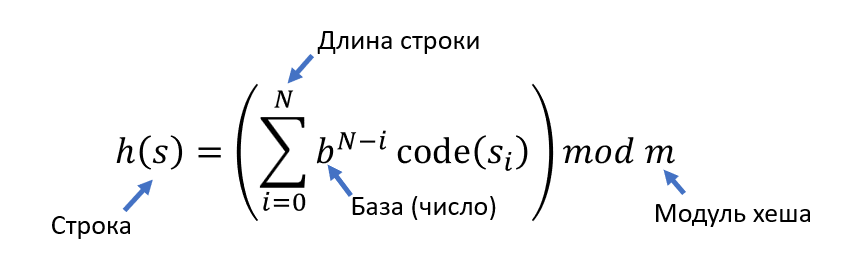

$s = s_0 s_1 s_2 s_3 s_4$  

$h(s) = s_0 b^4 + s_1 b^3 + s_2 b^2 + s_3 b^1 + s_4 b^0 $

Можно записать в виде рекурретного соотношения:

$h(prev_i) = b*h(pref_{i-1}) + code(s_{i-1})$, где $pref_{i}$ - префикс  длины $i$

$h(s_0 s_1 s_2) = h(s_0 s_1) * b + s_2$
$h(s_0 s_1) = h(s_0) * b + s_1$  
$h(s_0) = s_0$   


Как выбрать code?
- ASCII таблица
- алфавитные номера (номер символа в алфавите)
- своя код-функция

!!! Никогда не использовать 0 как код какого-либо символа !!!  
$h('a') = h('aa') =  h('aaa') = 0$


Свойства полиномиального хеша:
1. Вычисляется за $O(N)$
2. Является инъекцией, если правильно подобрать базу

Рекомендации к $b$ и $m$ для уменьшения коллизий:
1. p > max code
2. m > p
3. $m != 2^k$
4. m - простое число (желательно)


In [ ]:
def code(c):
  return ord(c) - ord('a') + 1

def poly_hash(s):
  b = 37
  h = 0
  m = 10**9 + 7
  for c in s:
    h = (h*b + code(c)) % m
  return h

print(poly_hash('abc'))
print(poly_hash('ac'))

1446
40


## Хеш-таблицы
Хэш-таблица определяется как структура данных, используемая для быстрой вставки, поиска и удаления пар ключ-значение. Он работает на основе концепции хеширования, где каждый ключ преобразуется хеш-функцией в отдельный индекс в массиве. Индекс функционирует как место хранения соответствующего значения. Простыми словами, он сопоставляет ключи со значением.
Например, ассоциативный массив - абстрактная структура данных, хранит пары (ключ, значение)
Операции:
- добавить новую пару
- удалить пару
- найти объект по ключу


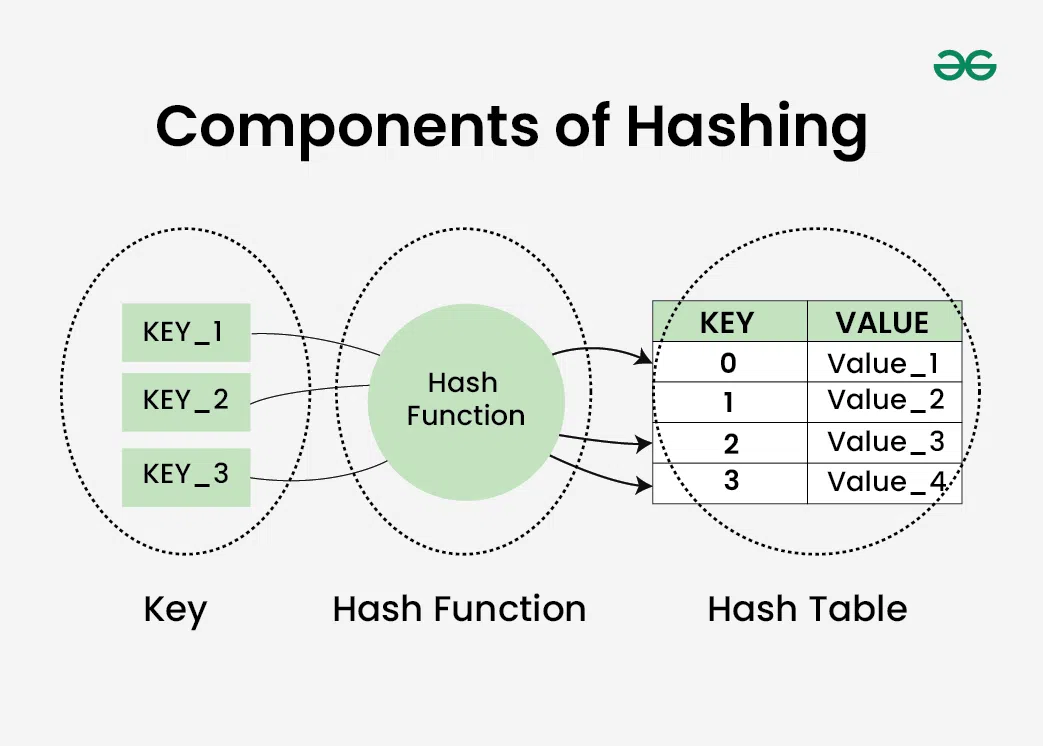

**Критерии, по которым выбирается хеш-функция:**

- Чтобы свести к минимуму количество коллизий, хорошая хеш-функция должна равномерно распределять ключи по всей хеш-таблице. Это означает, что для всех пар ключей вероятность того, что два ключа будут хешированы в одну и ту же позицию в таблице, должна быть относительно постоянной.

- Чтобы обеспечить быстрое хеширование и извлечение ключей, хеш-функция должна быть эффективной с точки зрения вычислений.

- Вывести ключ из его хэш-значения должно быть непросто. В результате
попытки угадать ключ с помощью хеш-значения имеют меньше шансов на успех.

- Хеш-функция должна быть достаточно гибкой, чтобы ее можно было корректировать в зависимости от изменения хешируемых данных. Например, хеш-функция должна продолжать работать должным образом, если размер или формат хешируемых ключей изменяются.



## Коллизии

Коллизии возникают, когда два или более ключей указывают на один и тот же индекс массива. Цепочка, открытая адресация и двойное хеширование — вот несколько методов разрешения коллизий.

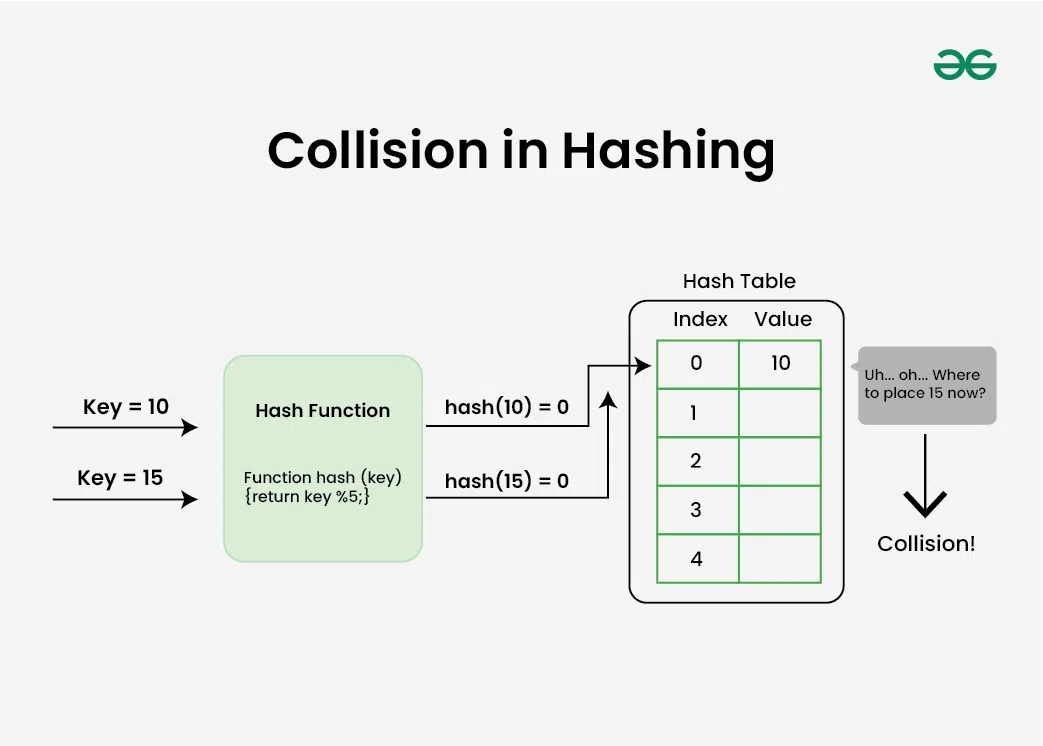

- **Открытая адресация**: коллизии обрабатываются путем поиска следующего пустого места в таблице. Если первый слот уже занят, хеш-функция применяется к последующим слотам до тех пор, пока один из них не останется пустым. Существует несколько способов использования этого подхода, включая двойное хеширование, линейное зондирование и квадратичное зондирование.

- **Метод цепочек - separate chaining**: При раздельной цепочке присутствует связанный список объектов, которые хешируются в каждый слот в хеш-таблице. Два ключа включаются в связанный список, если они хешируют в один и тот же слот. Этот метод довольно прост в использовании и может управлять несколькими коллизиями.

## Пример реализации хеш-таблицы

Словарь = хеш-таблица в Python

In [4]:
# Создание словаря (хеш-таблицы)
hash_table = {}  # или dict()

# Операции хеш-таблицы:
hash_table["apple"] = 1.50    # Вставка
hash_table["banana"] = 0.80   # Вставка
value = hash_table["apple"]   # Поиск O(1) в среднем случае
del hash_table["banana"]      # Удаление

In [5]:
# Хеш-функция применяется автоматически
print(hash("apple"))  # Получаем хеш-код ключа

# Проверка наличия ключа
if "apple" in hash_table:  # O(1) в среднем случае
    print("Найдено!")

# Итерация по элементам
for key, value in hash_table.items():
    print(f"{key}: {value}")

-6236855376710647037
Найдено!
apple: 1.5


1. Разрешение коллизий - открытая адресация

In [ ]:
# При коллизии Python ищет следующую свободную ячейку
data = {}
data[1] = "a"
data[8] = "b"

2. Динамическое изменение размера

In [6]:
# Автоматическое увеличение при заполнении
small_dict = {}
for i in range(1000):
    small_dict[i] = i  # Размер таблицы автоматически увеличивается

3. Требования к ключам
```python
# Ключи должны быть хешируемыми
valid_keys = [1, "hello", (1, 2), 3.14]
# invalid_keys = [[1,2], {1:2}]  # Нехэшируемые типы!
```


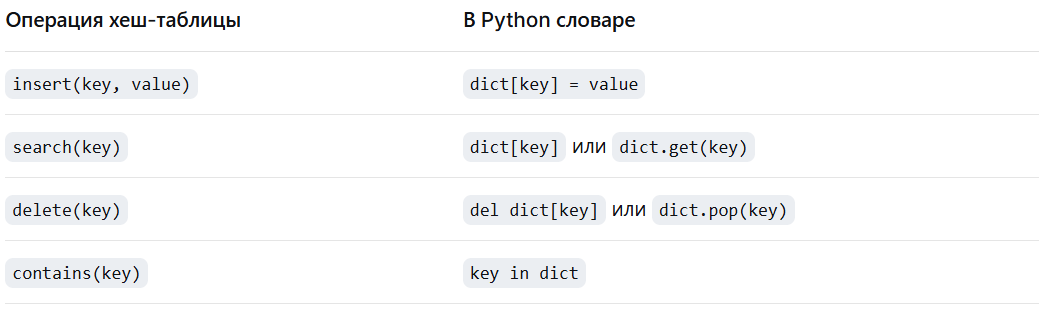

In [8]:
# Подсчет частоты элементов
def count_frequency(items):
    frequency = {}
    for item in items:
        frequency[item] = frequency.get(item, 0) + 1
    return frequency

words = ["apple", "banana", "apple", "orange", "banana", "apple"]
result = count_frequency(words)
print(result)  # {'apple': 3, 'banana': 2, 'orange': 1}

{'apple': 3, 'banana': 2, 'orange': 1}


### Пример с методом цепочек

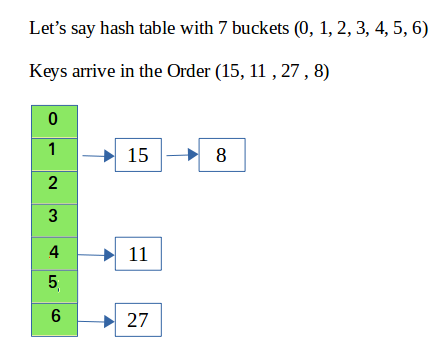

In [ ]:
# Python3 program to implement hashing with chaining
BUCKET_SIZE = 7


class Hash(object):
    def __init__(self, bucket):
        # Number of buckets
        self.__bucket = bucket
        # Hash table of size bucket
        self.__table = [[] for _ in range(bucket)]

    # hash function to map values to key
    def hashFunction(self, key):
        return (key % self.__bucket)

    def insertItem(self, key):
        # get the hash index of key
        index = self.hashFunction(key)
        self.__table[index].append(key)

    def deleteItem(self, key):
        # get the hash index of key
        index = self.hashFunction(key)

        # Check the key in the hash table
        if key not in self.__table[index]:
            return

        # delete the key from hash table
        self.__table[index].remove(key)

    # function to display hash table
    def displayHash(self):
        for i in range(self.__bucket):
            print("[%d]" % i, end='')
            for x in self.__table[i]:
                print(" --> %d" % x, end='')
            print()


# array that contains keys to be mapped
a = [15, 11, 27, 8, 12]

# Create a empty has of BUCKET_SIZE
h = Hash(BUCKET_SIZE)

# insert the keys into the hash table
for x in a:
    h.insertItem(x)

h.displayHash()
# delete 12 from the hash table
h.deleteItem(x)
print('-----------------')
# Display the hash table
h.displayHash()

[0]
[1] --> 15 --> 8
[2]
[3]
[4] --> 11
[5] --> 12
[6] --> 27
-----------------
[0]
[1] --> 15 --> 8
[2]
[3]
[4] --> 11
[5]
[6] --> 27


**Анализ сложности хеш-таблицы:**  
Для операций поиска, вставки и удаления хеш-таблицы имеют среднюю временную сложность в среднем случае O(1). Однако в худшем случае эти операции могут потребовать O(n) времени, где n — количество элементов в таблице.


**Области применения хеш-таблицы:**  
- Хеш-таблицы часто используются для индексации и поиска больших объемов данных. Поисковая система может использовать хеш-таблицу для хранения проиндексированных веб-страниц.
- Данные обычно кэшируются в памяти с помощью хеш-таблиц, что обеспечивает быстрый доступ к часто используемой информации.
- Хеш-функции часто используются в криптографии для создания цифровых подписей, проверки данных и обеспечения их целостности.
- Хеш-таблицы могут использоваться для реализации индексов баз данных, обеспечивая быстрый доступ к данным на основе ключевых значений.

### Пример с открытой адресацией
!!! все данные хранятся прямо в массиве таблицы, а при коллизии мы ищем другую свободную ячейку по определённому правилу.

- Пусть ключ попал по хешу в ячейку $i$.
Если она уже занята → мы ищем следующую пустую ячейку по некоторому алгоритму.

Эти алгоритмы называются методами пробирования (probes).

1. **Линейное пробирование (linear probing)**

```python
Самый простой способ:

i, i+1, i+2, i+3, ...
```

т.е. просто идём вперёд по массиву, пока не найдём свободное место.

 - Недостаток: кластеризация — образуются длинные группы занятых ячеек.

2. **Квадратичное пробирование (quadratic probing)**
```pyhton
i + 1^2, i + 2^2, i + 3^2, ...
```
Прыжки больше: 1, 4, 9, 16…

- Меньше кластеризация, но иногда некоторые ячейки недостижимы.

3. **Двойное хеширование (double hashing)**
```python
i, i + h2(key), i + 2*h2(key), i + 3*h2(key), ... где h2(key) — вторая хеш-функция.
```
- Это считается лучшим методом, потому что элементы распределяются равномернее.

Доступные операции:
1. **Поиск элемента**  
Поиск происходит так же, как вставка:

1.1. вычисляем i = hash(key)

1.2. если ключ не тот → пробируем следующую позицию

1.3. если нашли пустую ячейку раньше, чем ключ → его нет в таблице

2. **Удаление элемента**

Нельзя просто сделать ячейку пустой — иначе поиск может “сломаться” (найдём пустое место раньше времени и решим, что элемента нет).

Поэтому обычно делают:

- специальный маркер DELETED

- ячейка считается занятой для поиска, но свободной для вставки

**Простой пример (линейное пробирование)**
```python
Массив: размер 7  
Хеш-функция: key % 7

Вставляем: 10, 17, 24

10 % 7 = 3 → table[3] = 10
17 % 7 = 3 → занято → идём в 4 → table[4] = 17
24 % 7 = 3 → занято → 4 занято → идём в 5 → table[5] = 24
```

In [ ]:
class HashTableOpenAddressing:
    def __init__(self, size=7):
        self.size = size
        self.table = [None] * size
        self.deleted = object()  # Маркер для удаленных элементов
        self.count = 0  # Количество элементов в таблице

    def hash_function(self, key):
        """Основная хеш-функция"""
        return key % self.size

    def linear_probing(self, key, i):
        """Линейное пробирование"""
        return (self.hash_function(key) + i) % self.size

    def quadratic_probing(self, key, i):
        """Квадратичное пробирование"""
        return (self.hash_function(key) + i**2) % self.size

    def double_hashing(self, key, i):
        """Двойное хеширование"""
        h1 = self.hash_function(key)
        h2 = 1 + (key % (self.size - 1))
        return (h1 + i * h2) % self.size

    def insert(self, key, value, probing_method='linear'):
        """Вставка элемента в таблицу"""
        if self.count >= self.size * 0.7:  # Проверка коэффициента загрузки
            self._resize()

        for i in range(self.size):
            if probing_method == 'linear':
                index = self.linear_probing(key, i)
            elif probing_method == 'quadratic':
                index = self.quadratic_probing(key, i)
            else:  # double
                index = self.double_hashing(key, i)

            # Если ячейка пуста или содержит маркер удаления
            if self.table[index] is None or self.table[index] is self.deleted:
                self.table[index] = (key, value)
                self.count += 1
                return True

            # Если ключ уже существует, обновляем значение
            if self.table[index][0] == key:
                self.table[index] = (key, value)
                return True

        # Таблица заполнена
        return False

    def search(self, key, probing_method='linear'):
        """Поиск элемента по ключу"""
        for i in range(self.size):
            if probing_method == 'linear':
                index = self.linear_probing(key, i)
            elif probing_method == 'quadratic':
                index = self.quadratic_probing(key, i)
            else:  # double
                index = self.double_hashing(key, i)

            # Если нашли пустую ячейку, значит элемента нет
            if self.table[index] is None:
                return None

            # Пропускаем маркеры удаления
            if self.table[index] is self.deleted:
                continue

            # Если нашли ключ
            if self.table[index][0] == key:
                return self.table[index][1]

        return None

    def delete(self, key, probing_method='linear'):
        """Удаление элемента по ключу"""
        for i in range(self.size):
            if probing_method == 'linear':
                index = self.linear_probing(key, i)
            elif probing_method == 'quadratic':
                index = self.quadratic_probing(key, i)
            else:  # double
                index = self.double_hashing(key, i)

            # Если нашли пустую ячейку, значит элемента нет
            if self.table[index] is None:
                return False

            # Пропускаем маркеры удаления
            if self.table[index] is self.deleted:
                continue

            # Если нашли ключ
            if self.table[index][0] == key:
                self.table[index] = self.deleted
                self.count -= 1
                return True

        return False

    def _resize(self):
        """Увеличение размера таблицы при высокой загрузке"""
        old_table = self.table
        old_size = self.size

        # Увеличиваем размер в 2 раза (простое число для лучшего распределения)
        self.size = self._next_prime(self.size * 2)
        self.table = [None] * self.size
        self.count = 0

        # Перехеширование всех элементов
        for item in old_table:
            if item is not None and item is not self.deleted:
                self.insert(item[0], item[1])

    def _next_prime(self, n):
        """Поиск следующего простого числа"""
        def is_prime(num):
            if num < 2:
                return False
            for i in range(2, int(num**0.5) + 1):
                if num % i == 0:
                    return False
            return True

        while not is_prime(n):
            n += 1
        return n

    def display(self):
        """Отображение содержимого таблицы"""
        print("Хеш-таблица:")
        for i in range(self.size):
            if self.table[i] is None:
                print(f"[{i}]: пусто")
            elif self.table[i] is self.deleted:
                print(f"[{i}]: <удалено>")
            else:
                print(f"[{i}]: ключ={self.table[i][0]}, значение={self.table[i][1]}")


In [ ]:
# Создаем хеш-таблицу
ht = HashTableOpenAddressing(7)

print("=== Линейное пробирование ===")
# Вставляем элементы
test_data = [(15, "A"), (11, "B"), (27, "C"), (8, "D"), (12, "E"), (22, "F")]

for key, value in test_data:
    ht.insert(key, value, 'linear')
    print(f"Добавлен ключ {key}")

ht.display()

# Поиск элементов
search_keys = [11, 27, 99]
for key in search_keys:
    result = ht.search(key, 'linear')
    if result is not None:
        print(f"Ключ {key} найден, значение: {result}")
    else:
        print(f"Ключ {key} не найден")

# Удаление элемента
print("\nУдаляем ключ 11:")
ht.delete(11, 'linear')
ht.display()

# Поиск после удаления
result = ht.search(11, 'linear')
print(f"Поиск ключа 11 после удаления: {'найден' if result else 'не найден'}")

=== Линейное пробирование ===
Добавлен ключ 15
Добавлен ключ 11
Добавлен ключ 27
Добавлен ключ 8
Добавлен ключ 12
Добавлен ключ 22
Хеш-таблица:
[0]: пусто
[1]: пусто
[2]: пусто
[3]: пусто
[4]: пусто
[5]: ключ=22, значение=F
[6]: пусто
[7]: пусто
[8]: ключ=8, значение=D
[9]: пусто
[10]: ключ=27, значение=C
[11]: ключ=11, значение=B
[12]: ключ=12, значение=E
[13]: пусто
[14]: пусто
[15]: ключ=15, значение=A
[16]: пусто
Ключ 11 найден, значение: B
Ключ 27 найден, значение: C
Ключ 99 не найден

Удаляем ключ 11:
Хеш-таблица:
[0]: пусто
[1]: пусто
[2]: пусто
[3]: пусто
[4]: пусто
[5]: ключ=22, значение=F
[6]: пусто
[7]: пусто
[8]: ключ=8, значение=D
[9]: пусто
[10]: ключ=27, значение=C
[11]: <удалено>
[12]: ключ=12, значение=E
[13]: пусто
[14]: пусто
[15]: ключ=15, значение=A
[16]: пусто
Поиск ключа 11 после удаления: не найден


In [ ]:
print("\n=== Квадратичное пробирование ===")
ht2 = HashTableOpenAddressing(7)

for key, value in test_data:
    ht2.insert(key, value, 'quadratic')

ht2.display()


=== Квадратичное пробирование ===
Хеш-таблица:
[0]: пусто
[1]: пусто
[2]: пусто
[3]: пусто
[4]: пусто
[5]: ключ=22, значение=F
[6]: пусто
[7]: пусто
[8]: ключ=8, значение=D
[9]: пусто
[10]: ключ=27, значение=C
[11]: ключ=11, значение=B
[12]: ключ=12, значение=E
[13]: пусто
[14]: пусто
[15]: ключ=15, значение=A
[16]: пусто


In [ ]:
print("=== Двойное хеширование ===")
ht3 = HashTableOpenAddressing(7)

for key, value in test_data:
    ht3.insert(key, value, 'double')

ht3.display()

=== Двойное хеширование ===
Хеш-таблица:
[0]: пусто
[1]: пусто
[2]: пусто
[3]: пусто
[4]: пусто
[5]: ключ=22, значение=F
[6]: пусто
[7]: пусто
[8]: ключ=8, значение=D
[9]: пусто
[10]: ключ=27, значение=C
[11]: ключ=11, значение=B
[12]: ключ=12, значение=E
[13]: пусто
[14]: пусто
[15]: ключ=15, значение=A
[16]: пусто


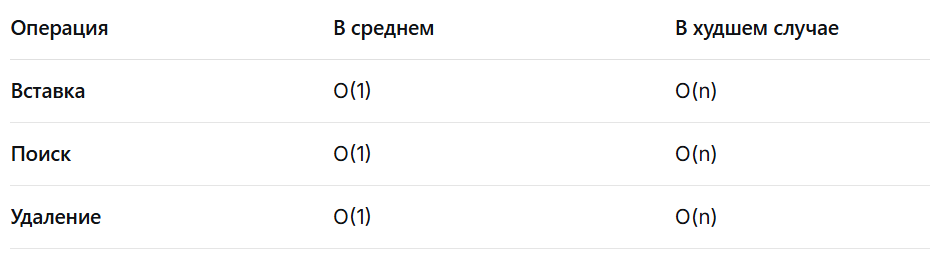

```python
# Все операции за константное время при хорошей хеш-функции
hash_table = {}
hash_table["key"] = "value"    # O(1) - вставка
value = hash_table["key"]      # O(1) - поиск  
del hash_table["key"]          # O(1) - удаление
```
Худший случай $O(n)$:
```python
# Все ключи имеют одинаковый хеш - все элементы в одной цепочке
class BadHash:
    def __hash__(self):
        return 1

hash_table = {}
for i in range(1000):
    hash_table[BadHash()] = i
```

Зависимость от коэффициента загрузки
```python
def analyze_load_factor():
    """
    Коэффициент загрузки α = n/m
    n - количество элементов
    m - размер таблицы
    """
    
    # Рекомендуемые значения:
    # Метод цепочек: α < 0.7-1.0
    # Открытая адресация: α < 0.7-0.8
    
    load_factors = {
        0.5: "Отличная производительность ~O(1)",
        0.7: "Хорошая производительность ~O(1)",
        0.9: "Производительность падает ~O(1-2)",
        1.0: "Возможны проблемы ~O(n) в худшем случае"
    }
```

## Алгоритм Рабина-Карпа  
Есть строка $S$ и шаблон $T$. Задача поиска подстроки в строке.
1. Вычисляем хеш для всего шаблона T $(O(T))$ и для всех префиксов S $(O(S))$ -> $O(n) + O(m)$
2. Возьмем подстроку длины T из S и посчитаем хеш
3. Сравним hash(T) c хешем подстроки -> $O(1)$
4. Повторим для всех подстрок

In [ ]:
def rabin_karp(text, pattern):
    n, m = len(text), len(pattern)
    if m > n:
        return []

    # параметры хеша
    p = 31              # основание полинома
    mod = 10**9 + 7     # большой модуль для уменьшения коллизий

    # ------------------------------------------
    # 1. Предвычисляем степени p:
    # ------------------------------------------
    p_pow = [1] * (n + 1)
    for i in range(1, n):
        p_pow[i] = (p_pow[i-1] * p) % mod

    # ------------------------------------------
    # 2. Префиксные хеши строки text
    #    h[i] = hash(text[0..i-1])
    # ------------------------------------------
    h = [0] * (n + 1)
    for i in range(n):
        h[i+1] = (h[i] + (ord(text[i]) - ord('a') + 1) * p_pow[i]) % mod

    # ------------------------------------------
    # 3. Хеш шаблона pattern
    # ------------------------------------------
    pattern_hash = 0
    for i in range(m):
        pattern_hash = (pattern_hash + (ord(pattern[i]) - ord('a') + 1) * p_pow[i]) % mod

    # ------------------------------------------
    # 4. Перебираем все позиции text, сравниваем хеши
    # ------------------------------------------
    result = []
    for i in range(n - m + 1):
        # Хеш подстроки text[i : i+m]
        # Используем формулу префиксных хешей:
        #   h_sub = h[i+m] - h[i]
        cur_hash = (h[i + m] - h[i] + mod) % mod

        # Чтобы хеши были в одной "степени":
        #   pattern_hash * p^i
        if cur_hash == (pattern_hash * p_pow[i] % mod):
            # Хеши совпали → возможное совпадение
            # Проверяем напрямую, чтобы исключить редкие коллизии
            if text[i:i+m] == pattern:
                result.append(i)

    return result

print(rabin_karp("abracadabra", "abra"))


[0, 7]


Из вики:  
Одно из простейших практических применений алгоритма Рабина — Карпа состоит в определении плагиата. Скажем, например, что студент пишет работу по Моби Дику. Коварный профессор находит различные исходные материалы по Моби Дику и автоматически извлекает список предложений в этих материалах. Затем алгоритм Рабина — Карпа может быстро найти в проверяемой статье примеры вхождения некоторых предложений из исходных материалов. Для устранения чувствительности алгоритма к небольшим различиям можно игнорировать детали, такие как регистр или пунктуация, при помощи их удаления. Поскольку количество строк, которые мы ищем, k, очень большое, обычные алгоритмы поиска одиночных строк становятся неэффективными.
